<a href="https://colab.research.google.com/github/PerttiP/ML-Project-in-Automated-Software-Engineering/blob/main/PerttiTrainingPerceptronModel1_24features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PerttiTrainingPerceptronModel1_24features
Google Colab version
-----------------------------------------
IMPORTANT PRE-REQUISITE:
Please first prepare Pandas dataframe by running PerttiPrepareData24features.ipynb
which will create the input file PrepDataframe24features.csv
------------------------------------------------------------------------------
Test run options:
OPT1. Enable Data augmentation.
OPT2. Enable resampling with SMOTE.

Updates:
UPD1. With extended data feature "absolute code churn measure" : code_churn.
UPD2. With feature selection (Removed redundant data).
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # visualization
import matplotlib.pyplot as plot

In [ ]:
# Install Imbalanced-learn library (used for SMOTE)
# https://imbalanced-learn.org/stable/install.html#getting-started
# https://anaconda.org/conda-forge/imbalanced-learn
# !conda install -c conda-forge imbalanced-learn # NOK: It gets stuck forever...
# !conda install conda-forge::imbalanced-learn # NOK: This also gets stuck forever...
# !pip install imbalanced-learn # Did this uninstall scikit-learn??? why???

# This exact command works in both Colab and Anaconda!:
!pip install -q scikit-learn imblearn

import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
# Utility functions
def print_sample(x, num_rows = 20):
    # Display a random sample in <x> of <num_rows> rows
    sample = x.sample(num_rows)
    pd.set_option('display.max_rows', len(sample))
    print('--------------------------')
    print(sample)
    pd.reset_option('display.max_rows')

In [ ]:
# Upload file to Colab
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import files
uploaded = files.upload()

Saving PrepDataframe24features.csv to PrepDataframe24features (1).csv


In [ ]:
# NOTE: Need to first upload pre-processed data file to Colab, See step 'Upload file to Colab' above!
# WARN: For unknown reason the uploaded file name sometimes get an extra id like (1)
import io
df = pd.read_csv(io.BytesIO(uploaded['PrepDataframe24features (1).csv']))

# Works only for Anaconda:
# df = pd.read_csv('./PrepDataframe.csv')
# df = pd.read_csv('./PrepDataframe24features.csv

# Make sure we have values everywhere
print(df.isnull().sum().max())

# Make sure that column isbuggy is an integer!
df['isbuggy'] = df['isbuggy'].astype(int)

# print('------- df:')
# df.info()
# print(df.dtypes)

0


In [ ]:
# OPT1. Data augmentation to increase the size of the dataset
# -----------------------------------------------------------
# NOTE: Using this crude oversampling constructs a perfect model!
for i in range(1,5): # Range changed back to 1,5
   df = df._append(df) # append is deprecated in newer Pandas

In [ ]:
print(df.shape)

# Print target class distribution counters, to see how imbalanced the dataset is
from collections import Counter
counter = Counter(df['isbuggy'])
print('Target class distribution counters:')
print(counter)

# Supervised Learning: include target (isbuggy) in training data
X = df
Y = df['isbuggy']
# print(Y)

# Split into training data (70%) and test data (30%)
#    TODO: Split also into validation data?
trainSize = int(df.shape[0] * 0.70)

# ALTERNATIVE: Split using method from sklearn.model_selection
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

trainX = X.iloc[0: trainSize, :]
trainY = Y[0: trainSize]

testX = X.iloc[trainSize: , :]
testY = Y[trainSize: ]

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(422128, 24)
Target class distribution counters:
Counter({0: 362256, 1: 59872})
(295489, 24) (295489,)
(126639, 24) (126639,)


In [ ]:
# OPT2. Oversampling of training data using SMOTE
# -----------------------------------------------
counter = Counter(trainY)
print('Distribution counters BEFORE SMOTE oversampling:')
print(counter)

from imblearn.over_sampling import SMOTE
trainXsmote, trainYsmote = SMOTE().fit_resample(trainX, trainY)

# Replace training data with oversampled data:
trainX = trainXsmote
trainY = trainYsmote

counter = Counter(trainYsmote)
print('Distribution counters AFTER SMOTE oversampling:')
print(counter)

Distribution counters BEFORE SMOTE oversampling:
Counter({0: 253468, 1: 42021})
Distribution counters AFTER SMOTE oversampling:
Counter({0: 253468, 1: 253468})


In [ ]:
# Data Transforms
# https://scikit-learn.org/stable/data_transforms.html

# Similar to the z-score method but involving simpler computation is the max-min method that
# computes the normalized feature value

# Normalization Step
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Perform fit only on training data?
trainX = scaler.fit_transform(trainX.values)
# FIXME:
print(trainX)
# trainX.tail

# Apply same transformation to test data (but do not use fit)!
testX = scaler.transform(testX.values)

print(testX)
# testX.tail()

[[-0.05032943 -0.0788547  -0.07908906 ...  0.73230379 -1.
  -0.06937635]
 [-0.05084365 -0.09409666 -0.14892135 ...  0.60288051 -1.
  -0.07186567]
 [-0.04775836 -0.0788547  -0.07908906 ... -0.31809629 -1.
  -0.06887849]
 ...
 [-0.04570151 -0.09409666 -0.14892135 ... -0.05103185  1.
  -0.06862956]
 [-0.04261623 -0.0788547  -0.07908906 ...  2.0864642   1.
  -0.06290412]
 [ 0.08490882  0.10404878  0.06057552 ... -0.91994046  1.
   0.00380964]]
[[-0.04313044 -0.0788547  -0.07908906 ...  2.22240785 -1.
  -0.06962528]
 [-0.04570151 -0.04837079  0.06057552 ...  1.90423402 -1.
  -0.05941907]
 [-0.01690553 -0.06361274 -0.07908906 ...  0.03780581  1.
  -0.04348743]
 ...
 [-0.04775836 -0.06361274 -0.00925677 ...  2.39413558 -1.
  -0.06987422]
 [-0.05032943 -0.0788547  -0.14892135 ... -0.76359782 -1.
  -0.07086994]
 [-0.05032943 -0.0788547  -0.07908906 ... -0.57465584 -1.
  -0.07012315]]


-- Epoch 1
Norm: 41.04, NNZs: 23, Bias: 6.300000, T: 506936, Avg. loss: 0.017653
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 41.37, NNZs: 23, Bias: 6.100000, T: 1013872, Avg. loss: 0.000814
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 41.37, NNZs: 23, Bias: 6.100000, T: 1520808, Avg. loss: 0.000000
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 41.37, NNZs: 23, Bias: 6.100000, T: 2027744, Avg. loss: 0.000000
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 41.37, NNZs: 23, Bias: 6.100000, T: 2534680, Avg. loss: 0.000000
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 41.37, NNZs: 23, Bias: 6.100000, T: 3041616, Avg. loss: 0.000000
Total training time: 0.61 seconds.
-- Epoch 7
Norm: 41.37, NNZs: 23, Bias: 6.100000, T: 3548552, Avg. loss: 0.000000
Total training time: 0.70 seconds.
Convergence after 7 epochs took 0.70 seconds
Counter({0: 108788, 1: 17851}) Counter({0: 108788, 1: 17851})
Accuracy: 1.0
-- Epoch 1
Norm: 32.77, NNZs: 23, Bias: 6.600000, T: 337957, 

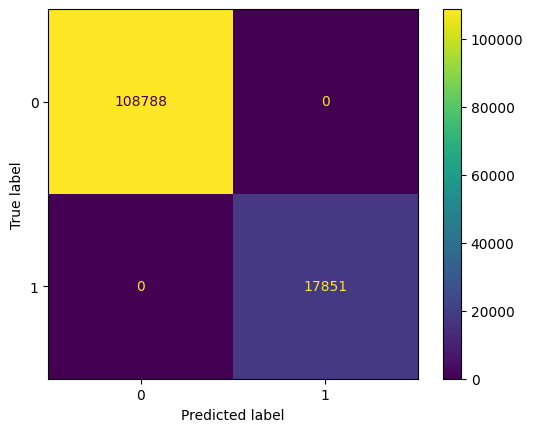

In [ ]:
#
# Perceptron
#
from sklearn.linear_model import Perceptron
'''
max_iter: The maximum number of passes over the training data (aka epochs).
eta0:     Constant by which the updates are multiplied (aka learning rate).
'''
clf = Perceptron(max_iter = 1000, eta0 = 0.1, verbose=1)

clf.fit(trainX, trainY)

predictY = clf.predict(testX)

print(Counter(testY), Counter(predictY))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, predictY)
# print(cm)
# ConfusionMatrixDisplay(cm, clf.classes_).plot() # WARN
# ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]).plot()
ConfusionMatrixDisplay(cm).plot()

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testY, predictY)
print("Accuracy:", accuracy)

# TODO: Should we evaluate more, using other metrics?
# Measuring Accuracy Using Cross-Validation (using method cross_val_score)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, trainX, trainY, cv=3, scoring="accuracy")
from numpy import mean, std
print('Mean Accuracy: %.3f (Std: %.3f)' % (mean(scores), std(scores)))

# Precision and Recall
from sklearn.metrics import precision_score, recall_score
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
ps = precision_score(testY, predictY)
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
rs = recall_score(testY, predictY)
print('precision: %f , recall: %f' % (ps, rs))

from sklearn.metrics import precision_recall_fscore_support
eval_result = precision_recall_fscore_support(testY, predictY, average='binary')
print(eval_result)